Now, discuss numerical models. Take some system, move it forward, re-calculate. Rinse, repeat.

In [ ]:
for i in (1,5,2,7,12):
    print(i,i*2,i**2)

In [ ]:
range(10)

In [ ]:
for i in range(10):
    print(i)

In [19]:
# Typical numerical loop:

# Set up initial conditions
nSteps = 5
for i in range(nSteps):
    # Update model. Probably actually ignore i.
    pass

Let's make our first computational model for climate change. We'll make a simplified (but actually reasonable) model. This comes from the Climate Science edX course linked on Moodle. It's the "Naked Planet."

Basic idea: heat comes in, heat goes out. We want to look at the overall heat content of the planet.

Simple model: the factors that change how much heat comes in and how much heat goes out are unrelated to each other and are unchanging.

Heat in:  L * (1-albedo) / 4
L = 1350                 # Watts/m2
Heat out: epsilon * sigma * T^4 (Stephan-Boltzmann law)
epsilon = 1
sigma = 5.67E-8          # W/m2 K4

Strategy: everything lives in a list, and we add things to the end of the list each time.
In this case, we'll calculate heat in, and heat out.
We'll use that to calculate heat flux.
Each step will be:

1. update our heat content based on how much heat flowed in/out last time.
2. figure out how much heat flows in
3. figure out how much heat flows out

Now a note about units.
The units you get from physical constants end up in seconds. For this, it's probably easier to think in terms of years, or 100s of years. So, let's multipy the heat flux by $60*60*24*365$ to get it into years.

We can then have a `timestep` that lets us go every year, 10 years, 100 years, etc.

Last thing about units: what we've done so far will come out in Joules, the unit of energy. We'll need temperature to get the heat_out right. "Heat Capacity" is the thing that converts between Joules and Kelvin for some physical object. It turns out that, for the Earth's oceans, a reasonable number is

heat_capacity = 16736000000

With T * heat_capacity = energy
or T = energy / heat_capacity

And we'll need to update T in our loop

In [14]:
timestep = 100.0 # years
water_depth = 4000.0 # m
L = 1350.0 # W/m^2
albedo = 0.3
epsilon = 1
sigma = 5.67e-8 # W/m^2 K^4
heat_capacity = 16736000000

time, T, heat_content, heat_in, heat_out, heat_flux = [], [], [], [], [], []

time.append(0)
T.append(0)
heat_content.append(0)
heat_in.append(L*(1-albedo)/4)
heat_out.append(epsilon*sigma*T[-1]**4)

heat_flux.append((heat_in[-1]-heat_out[-1])*60*60*24*365)

nSteps = 10
timestep = 100 # years
for i in range(nSteps):
    time.append(time[-1] + timestep)

    heat_content.append(heat_content[-1] + heat_flux[-1]*timestep)
    T.append(heat_content[-1]/heat_capacity)

    heat_in.append(L*(1-albedo)/4)
    heat_flux.append((heat_in[-1]-heat_out[-1])*60*60*24*365)
    heat_out.append(epsilon*sigma*T[-1]**4)
print(T)

[0, 44.517088910133836, 89.03417782026767, 133.50930580800963, 177.3550199598733, 218.47754370885372, 252.42373319790372, 272.5983199825788, 273.73848601679646, 259.25847030274446, 243.78520276382181]


In [15]:
from matplotlib import pyplot as plt

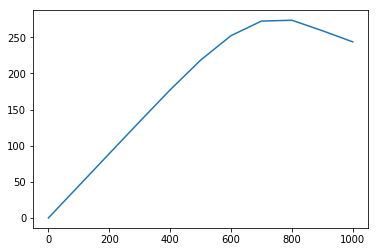

In [17]:
plt.plot(time,T)